<a href="https://colab.research.google.com/github/S07092001/ML-Work/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch-geometric torch-scatter torch-sparse torch-cluster #torch-spline-conv

  Using cached torch_geometric-2.7.0-py3-none-any.whl.metadata (63 kB)
  Using cached torch_scatter-2.1.2-cp312-cp312-linux_x86_64.whl
  Using cached torch_sparse-0.6.18-cp312-cp312-linux_x86_64.whl
  Using cached torch_cluster-1.6.3-cp312-cp312-linux_x86_64.whl
Using cached torch_geometric-2.7.0-py3-none-any.whl (1.3 MB)


In [4]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)


In [8]:
df = pd.read_csv("upi_transactions_2024.csv")
df.ffill(inplace=True)

categorical_cols = [
    "transaction type", "merchant_category", "sender_state",
    "sender_bank", "receiver_bank", "device_type",
    "network_type", "sender_age_group", "receiver_age_group","day_of_week"
]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()


,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,2,1,868,SUCCESS,1,0,1,0,6,0,1,0,15,5,0
1,TXN0000000002,2024-04-11 06:56:00,1,4,1011,SUCCESS,1,1,8,2,0,2,1,0,6,4,0
2,TXN0000000003,2024-04-02 13:27:18,2,4,477,SUCCESS,1,2,3,7,5,0,1,0,13,5,0
3,TXN0000000004,2024-01-07 10:09:17,2,3,2784,SUCCESS,1,1,1,2,5,0,2,0,10,3,1
4,TXN0000000005,2024-01-23 19:04:23,2,7,990,SUCCESS,1,0,1,0,7,2,3,0,19,5,0


In [9]:
X = df[
    ["amount (INR)", "hour_of_day", "day_of_week",
     "is_weekend", "transaction type",
     "device_type", "network_type"]
]

y = df["fraud_flag"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

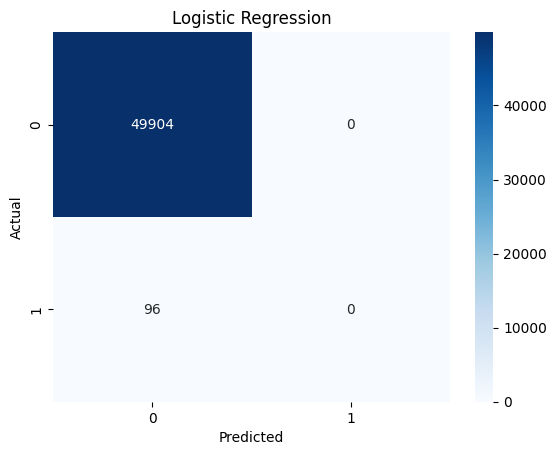

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49904
           1       0.00      0.00      0.00        96

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       1.00      1.00      1.00     50000

ROC-AUC: 0.4202751574690072


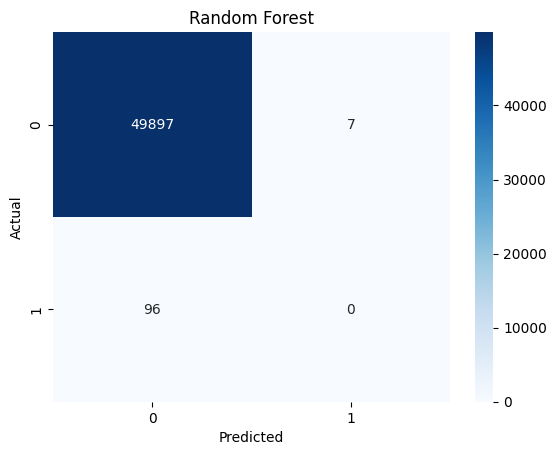

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49904
           1       0.00      0.00      0.00        96

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       1.00      1.00      1.00     50000

ROC-AUC: 0.48036500915090313


In [12]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression
lr_pred = lr.predict(X_test)
plot_cm(y_test, lr_pred, "Logistic Regression")
print(classification_report(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# Random Forest
rf_pred = rf.predict(X_test)
plot_cm(y_test, rf_pred, "Random Forest")
print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

In [13]:
node_features = df[
    ["amount (INR)", "hour_of_day", "day_of_week",
     "sender_bank", "receiver_bank"]
].values

x = torch.tensor(node_features, dtype=torch.float)
y_gnn = torch.tensor(df["fraud_flag"].values, dtype=torch.long)

edges = []
for i in range(len(df)-1):
    if df.loc[i, "sender_bank"] == df.loc[i+1, "sender_bank"]:
        edges.append([i, i+1])
        edges.append([i+1, i])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

data = Data(x=x, edge_index=edge_index, y=y_gnn)


In [14]:
num_nodes = data.num_nodes

data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

data.train_mask[:int(0.8*num_nodes)] = True
data.test_mask[int(0.8*num_nodes):] = True


In [15]:
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


In [16]:
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.NLLLoss()

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 1.6145
Epoch 20, Loss: 0.7888
Epoch 40, Loss: 0.6893
Epoch 60, Loss: 0.2112
Epoch 80, Loss: 0.0615


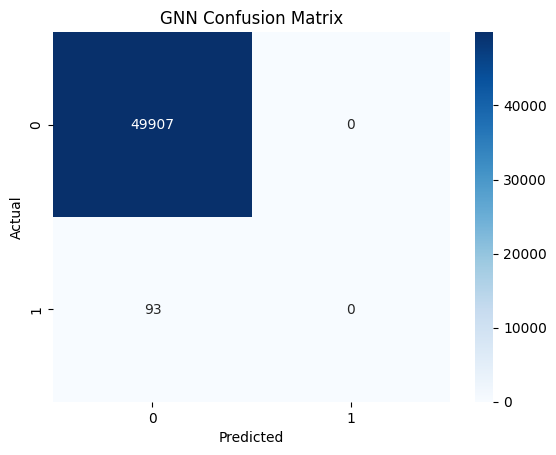

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49907
           1       0.00      0.00      0.00        93

    accuracy                           1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       1.00      1.00      1.00     50000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
model.eval()
pred = model(data).argmax(dim=1)

y_true = data.y[data.test_mask].cpu()
y_pred = pred[data.test_mask].cpu()

plot_cm(y_true, y_pred, "GNN Confusion Matrix")
print(classification_report(y_true, y_pred))


In [18]:
accuracy_gnn = (y_true == y_pred).sum().item() / len(y_true)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "GNN"],
    "Accuracy": [
        lr.score(X_test, y_test),
        rf.score(X_test, y_test),
        accuracy_gnn
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.99808
1,Random Forest,0.99794
2,GNN,0.99814


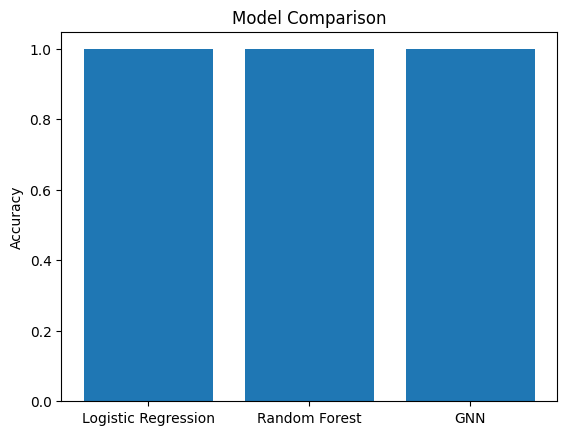

In [19]:
plt.bar(results["Model"], results["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [20]:
bank_encoder = encoders["sender_bank"]

def gnn_user_predict(amount, hour, day, sender_bank, receiver_bank):
    model.eval()

    sb = bank_encoder.transform([sender_bank])[0]
    rb = bank_encoder.transform([receiver_bank])[0]

    new_node = torch.tensor([[amount, hour, day, sb, rb]], dtype=torch.float)
    new_x = torch.cat([data.x, new_node], dim=0)

    new_edges = []
    new_idx = new_x.shape[0] - 1

    for i in range(data.x.shape[0]):
        if data.x[i][3] == sb:
            new_edges.append([i, new_idx])
            new_edges.append([new_idx, i])

    if new_edges:
        new_edge_index = torch.cat(
            [data.edge_index, torch.tensor(new_edges).t()],
            dim=1
        )
    else:
        new_edge_index = data.edge_index

    new_data = Data(x=new_x, edge_index=new_edge_index)
    out = model(new_data)
    pred = out[new_idx].argmax().item()

    return "Fraudulent Transaction" if pred == 1 else "Legitimate Transaction"


In [21]:
result = gnn_user_predict(
    amount=50000,
    hour=23,
    day=6,
    sender_bank="SBI",
    receiver_bank="HDFC"
)

print("Prediction:", result)


Prediction: Legitimate Transaction
